# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [1]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        pass
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        pass
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        ...
        return ypredicted


Importing necessary libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

## Loading and Exploring basic information about the dataset

In [3]:
dt = pd.read_csv("data.csv")

In [4]:
dt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [5]:
# Display the first 10 rows of the DataFrame dt
dt.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [6]:
# Get basic data stats (count, mean, std, min, max,..), includes numeric columns
dt.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2558.000000,2718.000000,2187.000000,2718.000000,2686.000000,2718.000000,2699.000000,2526.000000,2699.000000,2718.000000,2311.000000,2.104000e+03,2686.000000,2686.000000,2570.000000,2570.000000
mean,2007.113687,69.059308,165.771523,31.811994,4.581040,752.607792,80.838592,2571.444812,37.633060,44.077631,82.564283,5.859426,82.166358,1.826343,7498.829210,1.325711e+07,4.953611,4.995272,0.622851,11.922218
std,4.537979,9.562092,125.544472,122.257704,4.033137,2012.366099,25.264167,11893.625719,19.812908,166.281655,23.380578,2.431144,23.937591,5.257269,14387.883939,6.340774e+07,4.512805,4.606148,0.213593,3.367619
min,2000.000000,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.930000,5.664238,77.000000,0.000000,18.900000,0.000000,78.000000,4.220000,78.000000,0.100000,451.964816,1.966738e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,71.900000,144.000000,3.000000,3.675000,65.268121,92.000000,18.000000,42.200000,4.000000,93.000000,5.665000,93.000000,0.100000,1721.973863,1.396923e+06,3.400000,3.400000,0.673000,12.300000
75%,2011.000000,75.500000,227.000000,23.000000,7.600000,443.087991,97.000000,408.000000,55.700000,30.000000,97.000000,7.440000,97.000000,0.800000,5848.736168,7.523594e+06,7.300000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.000000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


In [7]:
# Summary of all column types, regardless of data type 
dt.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718,2718.000000,2718,2718.000000,2718.000000,2718.000000,2558.000000,2718.000000,2187.000000,2718.000000,...,2699.000000,2526.000000,2699.000000,2718.000000,2311.000000,2.104000e+03,2686.000000,2686.000000,2570.000000,2570.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.113687,NaN,69.059308,165.771523,31.811994,4.581040,752.607792,80.838592,2571.444812,...,82.564283,5.859426,82.166358,1.826343,7498.829210,1.325711e+07,4.953611,4.995272,0.622851,11.922218
std,NaN,4.537979,NaN,9.562092,125.544472,122.257704,4.033137,2012.366099,25.264167,11893.625719,...,23.380578,2.431144,23.937591,5.257269,14387.883939,6.340774e+07,4.512805,4.606148,0.213593,3.367619
min,NaN,2000.000000,NaN,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.000000,NaN,63.000000,74.000000,0.000000,0.930000,5.664238,77.000000,0.000000,...,78.000000,4.220000,78.000000,0.100000,451.964816,1.966738e+05,1.600000,1.600000,0.492000,10.100000
50%,NaN,2007.000000,NaN,71.900000,144.000000,3.000000,3.675000,65.268121,92.000000,18.000000,...,93.000000,5.665000,93.000000,0.100000,1721.973863,1.396923e+06,3.400000,3.400000,0.673000,12.300000
75%,NaN,2011.000000,NaN,75.500000,227.000000,23.000000,7.600000,443.087991,97.000000,408.000000,...,97.000000,7.440000,97.000000,0.800000,5848.736168,7.523594e+06,7.300000,7.300000,0.776000,14.200000


In [8]:
# Check and display the sum of null values for each column 
dt.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            160
percentage expenditure               0
Hepatitis B                        531
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  192
Diphtheria                          19
HIV/AIDS                             0
GDP                                407
Population                         614
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    148
Schooling                          148
dtype: int64

## Basic data pre-processing

The column named `thinness  1-19 years` contains duplicated white spaces.

In [9]:
# Change the column name 
dt.rename(columns={'thinness  1-19 years': 'thinness 1-19 years'}, inplace=True)

Dealing with missing values.

In [10]:
def create_nan_sum_for_each_column(df: pd.DataFrame, group_column: str):
    """Creates a DataFrame with the sum of NaN values for each column grouped by a specified column.

    Args:
        df (pd.DataFrame): Original DataFrame.
        group_column (str): Column name for grouping.
       
    Returns:
        nan_sum_df (pd.DataFrame): Grouped DataFrame containing the sum of NaN values for each column.
    """
    # Columns to exclude from NaN calculation
    exclude_columns = [group_column, "Status", "Country", "Life expectancy", "Adult Mortality", 
                       "infant deaths", "percentage expenditure", "under-five deaths", "HIV/AIDS"]

    # Create a DataFrame excluding specified columns
    df_subset = df.drop(columns=exclude_columns)

    # Convert NaN values to 1, non-NaN to 0
    df_subset = df_subset.isna()

    # Concatenate the binary NaN DataFrame with the grouping column
    df_with_group = pd.concat([df_subset, df[group_column]], axis=1)

    # Group by the specified column and calculate the sum of NaN values for each column
    nan_sum_df = df_with_group.groupby(group_column).sum()

    return nan_sum_df

In [11]:
# Calculate NaN sum for each column grouped by "Year"
year_nan_sum = create_nan_sum_for_each_column(dt, "Country")

# Display the result with all rows visible
pd.set_option("display.max_rows", None)
display(year_nan_sum)
pd.reset_option("display.max_rows")

,Year,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,4,0,0,0,0,0,0,0,0,0,0,0
Angola,0,1,7,0,0,0,1,0,0,0,0,0,0,0
Antigua and Barbuda,0,1,1,0,0,0,1,0,0,16,0,0,0,0
Argentina,0,1,2,0,0,0,1,0,0,0,0,0,0,0
Armenia,0,1,0,0,0,0,1,0,0,0,0,0,0,0
Australia,0,1,1,0,0,0,1,0,0,0,0,0,0,0
Austria,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
 # Calculate NaN sum for each column grouped by "Year"
year_nan_sum = create_nan_sum_for_each_column(dt, "Year")

# Display the result with all rows visible
pd.set_option("display.max_rows", None)
display(year_nan_sum)
pd.reset_option("display.max_rows")

,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,
2000,1,98,0,2,3,4,3,29,40,2,2,10,10
2001,1,88,0,2,3,4,3,28,40,2,2,10,10
2002,1,70,0,2,2,4,2,28,40,2,2,10,10
2003,1,52,0,2,2,3,2,28,40,2,2,10,10
2004,1,45,0,2,2,3,2,27,40,2,2,10,10
2005,2,36,0,2,2,3,2,27,40,2,2,10,10
2006,1,32,0,2,1,3,1,27,40,2,2,10,10
2007,1,24,0,2,1,3,1,27,40,2,2,10,10
2008,1,20,0,2,1,3,1,27,40,2,2,10,10


These outputs help analyze patterns in missing data:
- Which countries or years have the most missing values.
- Whether missing data is concentrated in certain columns for specific groups.
- Identify problematic data points to clean or address before further analysis.


Transform the entire dataset using one-hot encoding for the 'Country' column.

In [13]:
# Each unique country in the original column will have a separate binary column
dt = pd.get_dummies(dt, columns=['Country'], prefix='', prefix_sep='')
print(dt.head()) 

   Year      Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing             65.0            263.0             62     0.01   
1  2014  Developing             59.9            271.0             64     0.01   
2  2013  Developing             59.9            268.0             66     0.01   
3  2012  Developing             59.5            272.0             69     0.01   
4  2011  Developing             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  \
0               71.279624         65.0     1154  19.1  ...   
1               73.523582         62.0      492  18.6  ...   
2               73.219243         64.0      430  18.1  ...   
3               78.184215         67.0     2787  17.6  ...   
4                7.097109         68.0     3013  17.2  ...   

   United Republic of Tanzania  United States of America  Uruguay  Uzbekistan  \
0                        False                     False   

#### Data Splitting (training, testing, validation)

In [14]:
# Split the data into training, validation, and test sets
random_state = 8  # Set a random seed for reproducibility

# Split the data into training and test sets initially
X_train, X_test, y_train, y_test = train_test_split(dt.drop(columns=['Life expectancy']), dt['Life expectancy'], test_size=0.2, random_state=random_state) 

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

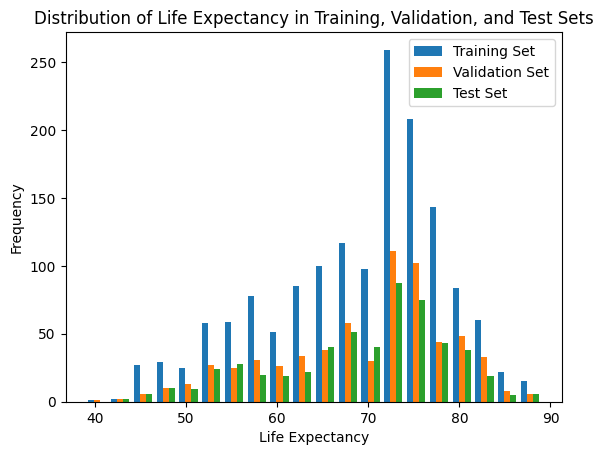

In [15]:
# Visualize the split of data into training, validation, and test sets
plt.hist([y_train, y_val, y_test], bins=20, label=['Training Set', 'Validation Set', 'Test Set'])
plt.title('Distribution of Life Expectancy in Training, Validation, and Test Sets')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Reset the indices. When data is split using train_test_split, the original row indices from the parent DataFrame (data) are preserved. This can lead to discontinuous or mismatched indices in the resulting subsets.
Resetting the indices ensures that the subsets (e.g., X_train, X_val, X_test) have sequential indices starting from 0, making it easier to work with them.

In [16]:
# Reset the index of the training set to start from 0
X_train.index = range(0, X_train.shape[0])

# Reset the index of the validation set to start from 0
X_val.index = range(0, X_val.shape[0])

# Reset the index of the test set to start from 0
X_test.index = range(0, X_test.shape[0])

# Reset the index of the training labels to start from 0
y_train.index = range(0, y_train.shape[0])

# Reset the index of the validation labels to start from 0
y_val.index = range(0, y_val.shape[0])

# Reset the index of the test labels to start from 0
y_test.index = range(0, y_test.shape[0])

Convert 'Status' to `bool`.

In [17]:
def convert_status_to_bool(df):
    """Convert the 'Status' column to boolean dtype.

    Args:
        df (pd.DataFrame): DataFrame containing the 'Status' column.

    Returns:
        df (pd.DataFrame): DataFrame with the 'Status' column converted to boolean dtype.
    """
    df["Status"] = df["Status"].replace({"Developing": False, "Developed": True}).astype(bool)

# Convert the 'Status' column to boolean dtype for the training set
convert_status_to_bool(X_train)

# Convert the 'Status' column to boolean dtype for the validation set
convert_status_to_bool(X_val)

# Convert the 'Status' column to boolean dtype for the test set
convert_status_to_bool(X_test)

Convert `float` to `int`.

In [18]:
def convert_float_int_columns(df):
    """Convert float columns with only zero decimals to integer dtype.

    Args:
        df (pd.DataFrame): DataFrame containing float columns with only zero decimals.

    Returns:
        df (pd.DataFrame): DataFrame with selected columns cast to integer dtype.
    """
    # Select columns with float dtype
    float_columns = df.select_dtypes("float64").columns

    for column in float_columns:
        # Check if all values in the column are integers (no decimals)
        if df[column].apply(lambda x: x.is_integer()).all():
            df[column] = df[column].astype(int)

    return df

# Apply the function to the training set
X_train = convert_float_int_columns(X_train)

# Apply the function to the validation set
X_val = convert_float_int_columns(X_val)

# Apply the function to the test set
X_test = convert_float_int_columns(X_test)

Convert `object` to `category`.

In [19]:
# Convert object columns to categorical dtype for the specified DataFrames
def obj_to_cat(df, columns: list):
    for column in columns:
        df[column] = df[column].astype('category')

# Identify object columns in the dataset
object_columns = list(dt.select_dtypes("object").columns)

# Apply the conversion function to the training set
obj_to_cat(X_train, object_columns)

# Apply the conversion function to the validation set
obj_to_cat(X_val, object_columns)

# Apply the conversion function to the test set
obj_to_cat(X_test, object_columns)

Display the data types of each column.

In [20]:
# in the training set
print("Training Set Column Types:")
print(X_train.dtypes)

# in the validation set
print("\nValidation Set Column Types:")
print(X_val.dtypes)

# in the test set
print("\nTest Set Column Types:")
print(X_test.dtypes)

Training Set Column Types:
Year                                     int64
Status                                category
Adult Mortality                          int64
infant deaths                            int64
Alcohol                                float64
                                        ...   
Venezuela (Bolivarian Republic of)        bool
Viet Nam                                  bool
Yemen                                     bool
Zambia                                    bool
Zimbabwe                                  bool
Length: 203, dtype: object

Validation Set Column Types:
Year                                     int64
Status                                category
Adult Mortality                          int64
infant deaths                            int64
Alcohol                                float64
                                        ...   
Venezuela (Bolivarian Republic of)        bool
Viet Nam                                  bool
Yemen                  

#### Handling Missing Values
1. Replacing Missing Values with Zeros
2. Iterative Imputation - missing values are replaced by statistically inferred values that are consistent with the patterns in the data.
3. K-Nearest Neighbors (KNN) Imputation - missing values are replaced based on the values of the nearest neighbors, preserving the relationships in the data.

   By applying all three methods, the code prepares multiple versions of the datasets to evaluate which imputation method yields the best model performance. 

In [21]:
# Fill missing values with zeros
z_Xtrain = X_train.replace(np.nan, 0)
z_Xval = X_val.replace(np.nan, 0)
z_Xtest = X_test.replace(np.nan, 0)

# Iterative imputation
it_imputer = IterativeImputer()
it_imputer.fit(X_train)
it_Xtrain = it_imputer.transform(X_train)
it_Xval = it_imputer.transform(X_val)
it_Xtest = it_imputer.transform(X_test)

# KNN imputation 
knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit(X_train)
knn_Xtrain = knn_imputer.transform(X_train)
knn_Xval = knn_imputer.transform(X_val)
knn_Xtest = knn_imputer.transform(X_test)

#### Feature Scaling: Standard Scaling (Z-score normalization)

the function that applies Standard Scaling (Z-score normalization) to the given datasets (X_train, X_val, X_test), this step ensures that models work optimally by standardizing the input data; scales features to have a mean of 0 and standard deviation of 1; allows for negative values

In [22]:
def apply_standard_scaler(X_train: pd.DataFrame, X_val: pd.DataFrame, X_test: pd.DataFrame):
    """Apply StandardScaler to given datasets.

    Args:
        X_train (pd.DataFrame): Initial training dataset.
        X_val (pd.DataFrame): Initial validation dataset.
        X_test (pd.DataFrame): Initial testing dataset.

    Returns:
        st_X_train (pd.DataFrame): Scaled training dataset.
        st_X_val (pd.DataFrame): Scaled validation dataset.
        st_X_test (pd.DataFrame): Scaled testing dataset.
    """
    st_scaler = StandardScaler()
    
    # Convert to DataFrame if the input is a numpy array
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
        X_val = pd.DataFrame(X_val)
        X_test = pd.DataFrame(X_test)
        
    st_scaler.fit(X_train)
    st_Xtrain = pd.DataFrame(st_scaler.transform(X_train), columns=X_train.columns)
    st_Xval = pd.DataFrame(st_scaler.transform(X_val), columns=X_val.columns)
    st_Xtest = pd.DataFrame(st_scaler.transform(X_test), columns=X_test.columns)
    
    return st_Xtrain, st_Xval, st_Xtest

#### Feature Scaling: Min-Max Scaling (Normalization)

scales features to a fixed range [0, 1]; ensures all values are non-negative (if the input data is non-negative); useful when feature magnitudes need to be preserved relative to each other

In [23]:
 def apply_min_max_scaler(X_train: pd.DataFrame, X_val: pd.DataFrame, X_test: pd.DataFrame):
    """Apply MinMaxScaler to given datasets.

    Args:
        X_train (pd.DataFrame): Initial training dataset.
        X_val (pd.DataFrame): Initial validation dataset.
        X_test (pd.DataFrame): Initial testing dataset.

    Returns:
        mm_Xtrain (pd.DataFrame): Scaled training dataset.
        mm_Xval (pd.DataFrame): Scaled validation dataset.
        mm_Xtest (pd.DataFrame): Scaled testing dataset.
    """
    mm_scaler = MinMaxScaler()
    
    # Convert to DataFrame if the input is a numpy array
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
        X_val = pd.DataFrame(X_val)
        X_test = pd.DataFrame(X_test)

    mm_scaler.fit(X_train)
    mm_Xtrain = pd.DataFrame(mm_scaler.transform(X_train), columns=X_train.columns)
    mm_Xval = pd.DataFrame(mm_scaler.transform(X_val), columns=X_val.columns)
    mm_Xtest = pd.DataFrame(mm_scaler.transform(X_test), columns=X_test.columns)
    
    return mm_Xtrain, mm_Xval, mm_Xtest

#### Imputation and Scaling: Zeros, Iterative, and KNN Methods with Standard and Min-Max Scaling

apply imputation and scaling techniques to the datasets processed with different missing value imputation methods (Zeros, Iterative, and KNN). Each imputed dataset is scaled using two scaling methods: Standard Scaling (Z-score normalization) and Min-Max Scaling (Normalization);

Imputation handles missing values in the data by replacing them with estimates or specific values;

Scaling adjusts feature magnitudes to ensure consistent ranges, making them comparable for machine learning algorithms.

In [24]:
# Zeros Imputation and Scaling
z_st_Xtrain, z_st_Xval, z_st_Xtest = apply_standard_scaler(z_Xtrain, z_Xval, z_Xtest)
z_mm_Xtrain, z_mm_Xval, z_mm_Xtest = apply_min_max_scaler(z_Xtrain, z_Xval, z_Xtest)

# Iterative Imputation and Scaling
it_st_Xtrain, it_st_Xval, it_st_Xtest = apply_standard_scaler(it_Xtrain, it_Xval, it_Xtest)
it_mm_Xtrain, it_mm_Xval, it_mm_Xtest = apply_min_max_scaler(it_Xtrain, it_Xval, it_Xtest)

# KNN Imputation and Scaling
knn_st_Xtrain, knn_st_Xval, knn_st_Xtest = apply_standard_scaler(knn_Xtrain, knn_Xval, knn_Xtest)
knn_mm_Xtrain, knn_mm_Xval, knn_mm_Xtest = apply_min_max_scaler(knn_Xtrain, knn_Xval, knn_Xtest)

### Ridge Regression

In [25]:
# Lists to store training data, plot colors, and labels
list_train_data = [z_st_Xtrain, z_mm_Xtrain, it_st_Xtrain, it_mm_Xtrain, knn_st_Xtrain, knn_mm_Xtrain]
list_colors = ['b-', 'r-', 'g-', 'c-', 'm-', 'k-']
list_labels = ['z_st_Xtrain', 'z_mm_Xtrain', 'it_st_Xtrain', 'it_mm_Xtrain', 'knn_st_Xtrain', 'knn_mm_Xtrain']

In [26]:
def perform_ridge_regression(X_train: pd.DataFrame, y_train: pd.Series, color: str, label: str):
    """Perform Ridge Regression and plot the RMSE values.

    Args:
        X_train (pd.DataFrame): Training dataset.
        y_train (pd.Series): Target variable for training.
        color (str): Plot color.
        label (str): Plot label.
    """
    RMSE_train_ridge = []
    acc = []

    for alpha in range(0, 50):
        clf_ridge = Ridge(alpha)
        clf_ridge.fit(X_train, y_train)

        # Calculate RMSE and R2 score
        RMSE_train_ridge.append(np.sqrt(mean_squared_error(y_train, clf_ridge.predict(X_train))))
        acc.append(r2_score(y_train, clf_ridge.predict(X_train)))

    # Plot RMSE values over alpha values
    plt.plot(range(0, 50), RMSE_train_ridge, color, label=label)
    
    # Display minimum RMSE and corresponding alpha value
    min_rmse_index = RMSE_train_ridge.index(min(RMSE_train_ridge))
    print(label, "Minimum RMSE =", min(RMSE_train_ridge), "at alpha =", min_rmse_index)
    
    # Display maximum R2 score and corresponding alpha value
    max_r2_index = acc.index(max(acc))
    print("Maximum R2 Score =", max(acc), "at alpha =", max_r2_index)

z_st_Xtrain Minimum RMSE = 1.6961210815424674 at alpha = 0
Maximum R2 Score = 0.9688255864836156 at alpha = 0
z_mm_Xtrain Minimum RMSE = 1.696492154185888 at alpha = 0
Maximum R2 Score = 0.9688119444888773 at alpha = 0
it_st_Xtrain Minimum RMSE = 1.699156690104226 at alpha = 0
Maximum R2 Score = 0.9687138987015056 at alpha = 0
it_mm_Xtrain Minimum RMSE = 1.6994698090097442 at alpha = 0
Maximum R2 Score = 0.9687023668957846 at alpha = 0
knn_st_Xtrain Minimum RMSE = 1.705254345028207 at alpha = 0
Maximum R2 Score = 0.9684889469285293 at alpha = 0
knn_mm_Xtrain Minimum RMSE = 1.7055372885814368 at alpha = 0
Maximum R2 Score = 0.9684784891466421 at alpha = 0


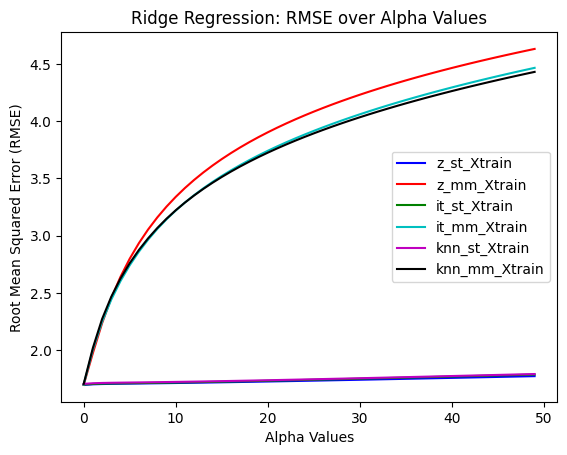

In [27]:
for i, train_data in enumerate(list_train_data):
    perform_ridge_regression(train_data, y_train, list_colors[i], list_labels[i])

plt.xlabel("Alpha Values")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Ridge Regression: RMSE over Alpha Values")
plt.legend()
plt.show()

Each line represents a Ridge Regression model trained on different imputed and scaled datasets (e.g., z_st_Xtrain, it_mm_Xtrain, etc.).

#### Evaluate Ridge Regression Model for Overfitting

In [28]:
 # Train Ridge Regression model with alpha=0 on the standardized and imputed training data
clf_ridge = Ridge(alpha=0).fit(it_st_Xtrain, y_train) 

# Make predictions on the standardized and imputed validation data
predictions = clf_ridge.predict(it_st_Xval)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2) as an accuracy metric
acc = r2_score(y_val, predictions)
print("R-squared (R2):", acc)

Root Mean Squared Error (RMSE): 1.7925703899229934
Mean Absolute Error (MAE): 1.1572462433675037
R-squared (R2): 0.9646591303960821


### Decision Tree Regressor

In [29]:
def decision_tree_regressor(Xtrain: pd.DataFrame, ytrain: pd.Series, color: str, label: str):
    """
    Perform Decision Tree Regressor analysis and plot RMSE vs max_depth.

    Args:
        Xtrain (pd.DataFrame): Training dataset.
        ytrain (pd.Series): Target variable.
        color (str): Color for plotting.
        label (str): Label for the plot.

    Returns:
        None
    """
    # Range of max_depth values to explore
    depths = range(1, 20)

    RMSE_acc = []
    acc = []

    # Fit Decision Tree Regressor for different max_depth values
    for depth in depths:
        clf_tree = DecisionTreeRegressor(max_depth=depth).fit(Xtrain, ytrain)
        RMSE_acc.append(np.sqrt(mean_squared_error(ytrain, clf_tree.predict(Xtrain))))
        acc.append(r2_score(ytrain, clf_tree.predict(Xtrain)))

    # Plot RMSE vs max_depth
    plt.plot(depths, RMSE_acc, color, label=label)
    
    # Print results
    print(label, "Minimum RMSE =", min(RMSE_acc), "at max_depth =", depths[RMSE_acc.index(min(RMSE_acc))])
    print("Maximum R2 Score =", max(acc), "at max_depth =", depths[acc.index(max(acc))])

z_st_Xtrain Minimum RMSE = 0.051818758961899476 at max_depth = 19
Maximum R2 Score = 0.9999709023039658 at max_depth = 19
z_mm_Xtrain Minimum RMSE = 0.051818758961899476 at max_depth = 19
Maximum R2 Score = 0.9999709023039658 at max_depth = 19
it_st_Xtrain Minimum RMSE = 0.17832985653284433 at max_depth = 19
Maximum R2 Score = 0.9996553861657115 at max_depth = 19
it_mm_Xtrain Minimum RMSE = 0.17832985653284433 at max_depth = 19
Maximum R2 Score = 0.9996553861657115 at max_depth = 19
knn_st_Xtrain Minimum RMSE = 0.09655449024043426 at max_depth = 19
Maximum R2 Score = 0.9998989748420265 at max_depth = 19
knn_mm_Xtrain Minimum RMSE = 0.09655449024043425 at max_depth = 19
Maximum R2 Score = 0.9998989748420265 at max_depth = 19


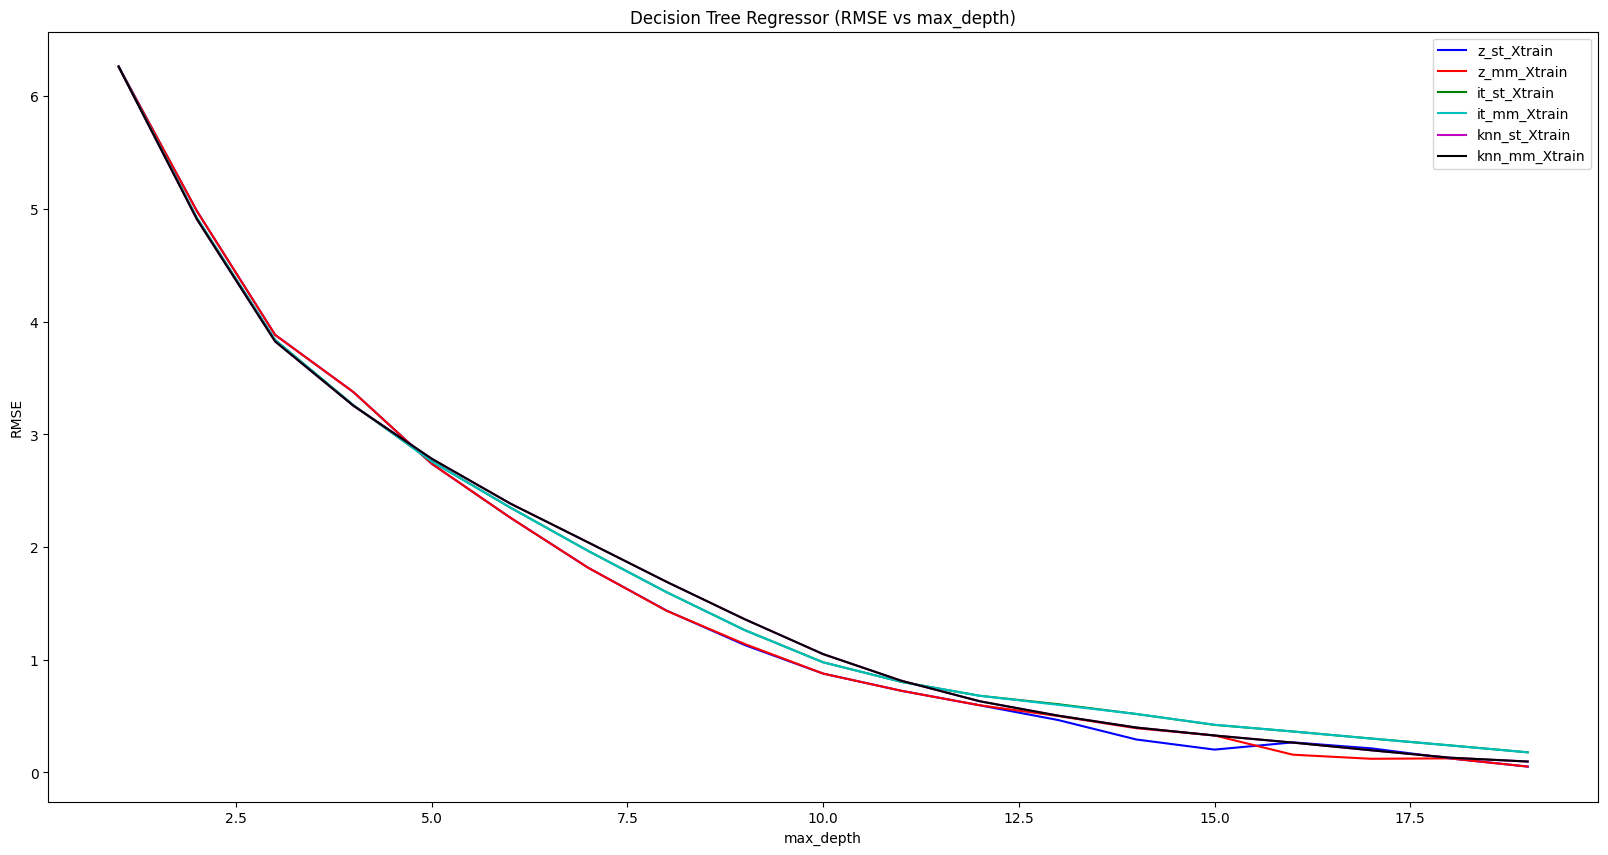

In [30]:
# Plotting Decision Tree Regressor analysis for different training datasets
plt.figure(figsize=(20, 10))
plt.title("Decision Tree Regressor (RMSE vs max_depth)")
plt.ylabel("RMSE")
plt.xlabel("max_depth")

# Loop through different training datasets and plot results
for train_data, color, label in zip(list_train_data, list_colors, list_labels):
    decision_tree_regressor(train_data, y_train, color, label)

plt.legend()
plt.show()

#### Evaluate Decision Tree Regression Model for Overfitting

In [31]:
# Train Decision Tree Regression model with max depth of 9 on the standard scaled training data
clf_tree = DecisionTreeRegressor(max_depth=9).fit(z_st_Xtrain, y_train)

# Make predictions on the standard scaled validation data
predictions = clf_tree.predict(z_st_Xval)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2) as an accuracy metric
acc = r2_score(y_val, predictions)
print("R-squared (R2):", acc)

Root Mean Squared Error (RMSE): 2.64243182416857
Mean Absolute Error (MAE): 1.6459489162707144
R-squared (R2): 0.9232051003583001


## Random Forest

In [32]:
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_(X,y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
    def _bootstrap_(self, X, y):
        n_samples = X.shape[0]
        indexes = np.random.choice(n_samples, self.max_samples, replace=True)
        return X.iloc[indexes], y.iloc[indexes]
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        predictions = np.array([tree.predict(X) for tree in self.trees])  
        tree_predictions = np.swapaxes(predictions, 0, 1)
        predictions = np.mean(tree_predictions, axis=1)
        return predictions  

In [33]:
def random_forest(X_train: pd.DataFrame, y_train: pd.Series, label: str):
    """
    Perform Random Forest regression with different hyperparameter values and print results.

    Args:
        X_train (pd.DataFrame): Training features.
        ytrain (pd.Series): Training target variable.
        label (str): Label for identifying the dataset.

    Returns:
        None
    """
    f_rmse = np.inf
    f_acc = 0
    for n_tree in range(10,15):
        for n_sample in range(X_train.shape[0] - 5, X_train.shape[0]):
            for n_depth in range(10,15):
                crf = CustomRandomForest(n_estimators=n_tree, max_samples=n_sample, max_depth=n_depth)
                crf.fit(X_train, y_train)
                RMSE_acc = np.sqrt(mean_squared_error(y_train, crf.predict(X_train)))
                acc = r2_score(y_train, crf.predict(X_train))
                if RMSE_acc < f_rmse:
                    f_rmse = RMSE_acc
                    f_acc = acc
                    best_params = [n_tree, n_sample, n_depth]
    
    print(label, "RMSE =", f_rmse)
    print("acc =", f_acc)
    print("Best parameters:", *best_params)    

In [34]:
# Loop through different training datasets and perform Random Forest regression
for train_data, label in zip(list_train_data, list_labels):
    random_forest(train_data, y_train, label)

z_st_Xtrain RMSE = 0.8505390144593895
acc = 0.9921607761350332
Best parameters: 14 1520 14
z_mm_Xtrain RMSE = 0.8386927242894369
acc = 0.9923776245173079
Best parameters: 14 1518 14
it_st_Xtrain RMSE = 0.8659125128822817
acc = 0.9918748269661263
Best parameters: 13 1520 14
it_mm_Xtrain RMSE = 0.888002385130855
acc = 0.9914549845536665
Best parameters: 13 1520 14
knn_st_Xtrain RMSE = 0.8908227412172984
acc = 0.9914006192539188
Best parameters: 14 1516 14
knn_mm_Xtrain RMSE = 0.8772167285471134
acc = 0.9916612990752108
Best parameters: 14 1517 14


In [35]:
# Instantiate the CustomRandomForest model with specific hyperparameters
crf = CustomRandomForest(n_estimators=11, max_samples=1516, max_depth=14)

# Train the model on the specified training dataset (it_st_Xtrain) and target variable (ytrain)
crf.fit(it_st_Xtrain, y_train)

# Make predictions on the validation dataset (it_st_Xval)
predictions = crf.predict(it_st_Xval)

# Evaluate the performance of the model using different metrics
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print("Root Mean Squared Error (RMSE) =", rmse)

mae = mean_absolute_error(y_val, predictions)
print("Mean Absolute Error (MAE) =", mae)

acc = r2_score(y_val, predictions)
print("R2 Score =", acc)

Root Mean Squared Error (RMSE) = 2.014679791336315
Mean Absolute Error (MAE) = 1.3107090510512067
R2 Score = 0.9553586977357786


### The best model is Ordinary Linear Regression

Its performance metrics on the validation dataset show that it has the lowest RMSE and highest R², which are signs of strong predictive performance and a good fit for the data.

In [36]:
# Train Ordinary Linear Regression Model
clf_ridge = Ridge(alpha=0).fit(it_st_Xtrain, y_train)

# Make Predictions on the Test Set
predictions = clf_ridge.predict(it_st_Xtest)

# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

acc = r2_score(y_test, predictions)
print("R2:", acc)

Root Mean Squared Error (RMSE): 1.8060033232324506
Mean Absolute Error (MAE): 1.166110469796816
R2: 0.9635206088377567


## Results

In [37]:
final = pd.read_csv('evaluation.csv') 

In [38]:
# Extracting specific columns
table_ = final[['Country', 'Year']]

In [39]:
final.columns 

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [40]:
final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          177 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      188 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

In [41]:
# Renaming column
final.rename(columns={'thinness  1-19 years': 'thinness 1-19 years'}, inplace=True)

In [42]:
len(list(final['Country'].unique())) 

35

In [43]:
# One-Hot Encoding for 'Country' Column
final = pd.get_dummies(final, columns=['Country'], prefix='', prefix_sep='')

In [44]:
# Convert `object` to `category` 
obj_to_cat(final, list(final.select_dtypes("object").columns))

In [45]:
# Convert `float` to `int`
final = convert_float_int_columns(final)

In [46]:
 # Convert 'Status' to `bool`
convert_status_to_bool(final)

In [47]:
# Convert final back to a Pandas DataFrame if it was converted to a NumPy array
final = pd.DataFrame(final, columns=final.columns)

In [48]:
# Merging columns
def merge_columns(df, final):
    df_columns = df.columns
    final_columns = final.columns
    
    for i in df_columns:
        if i in final_columns:
            continue
        else:
            zeros = [False for _ in range(0, final.shape[0])]
            final = pd.concat([final, pd.Series(data=zeros, dtype='bool', name=i)], axis=1)
    
    return final

In [49]:
 # Preprocessing Data
final = merge_columns(X_train, final)  # Merging Columns
final = final[X_train.columns]  # Reordering Columns
final = it_imputer.transform(final)  # Iterative Imputation

# Standard Scaling
st_sc = StandardScaler()
st_sc.fit(it_Xtrain)
final = st_sc.transform(final)

# Convert final back to a Pandas DataFrame
final = pd.DataFrame(final, columns=X_train.columns)

In [50]:
# Making predictions
predictions = pd.Series(data=clf_ridge.predict(final), name='Life expectancy', dtype='float')

In [51]:
# Generating Results Table
table_ = pd.concat([table_, predictions], axis=1)
table_['Life expectancy'] = table_['Life expectancy'].round(1)
table_.to_csv("results.csv", index=False)

In [52]:
results_df = pd.read_csv('results.csv')
# Display the first few rows of the DataFrame
print(results_df.head())

   Country  Year  Life expectancy
0  Albania  2015             77.4
1  Albania  2014             77.2
2  Albania  2013             76.7
3  Albania  2012             76.4
4  Albania  2011             76.0
